In [1]:
#########################################################################################################################
# Set up the most basic analytics pipeline for the forecast project.                                 04-10.2018         #         
#–Use close price as input                                                                                              #
#–Create a label 1-day ahead                                                                                            # 
#–Train your linear model                                                                                               #
#–Create a prediction                                                                                                   #
#–Visualize prediction and price in same chart          
########################################################################################################################
# In this Assignment, we mainly focus on features and determining a decision, by
# forecasting the Stock Prediction one-stepahead on the CLOSE(ed price) column
# Applied a few averaging techniques that can be used for one-step ahead predictions
########################################################################################################################                                                                                                                       #
#                                                      Assignment -2    
#
#                                                                          Jyothi Nandikonda                                                    
#                                                                                                   Course 1
#########################################################################################################################


In [2]:
#####################################################################################
## Make sure that you have all these libaries available to run the code successfully
####################################################################################

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
##########################################
# Importing the Data reader Library
##########################################

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader.data import DataReader

In [4]:
###############################################
# Retreiving the today's date from datetime
#############################################
end = dt.datetime.now()
print(end) # to test what date it will print

2018-10-03 22:34:01.495205


In [5]:
########################################################
# Taking 5 Years of Data , Eg: Staring from Today
# Define the time frame of Stock , 5 yrs back from today
#########################################################
start = end - dt.timedelta(days=5*365) 
print(start)

2013-10-04 22:34:01.495205


In [6]:
# Use DataReader to get APPLES Stock data from IEX
# You get data from IEX in OHLC (OPEN,HIGH,LOW,CLOSE) + Vol format
# Analyze data for a single stock 'AAPL'
#
df = DataReader('AAPL','iex',start,end)
df = df.sort_values('date')

5y


In [7]:
df.head()
#######################################################################
# Prints the  First 5 rows of Open, High, Low, Close : Basically price 
#Stock prices come in several different flavours. 
#Each day has a record for:
#Open: Opening stock price of the day
#Close: Closing stock price of the day
#High: Highest stock price of the data
#Low: Lowest stock price of the day
#– Each day also have a volume
#######################################################################

,open,high,low,close,volume
date,,,,,
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488
2013-10-10,64.2667,64.4053,63.7068,64.0467,69650490


In [8]:
############################################################################ 
#creating a 1 day ahead forecast column for close price called label
############################################################################
df['label'] = df['close'].shift(-1)
df.head()

,open,high,low,close,volume,label
date,,,,,,
2013-10-04,63.2909,63.3877,62.6029,63.1823,64673329,63.7997
2013-10-07,63.6441,64.4407,63.4858,63.7997,77919884,62.9089
2013-10-08,64.0862,64.1777,62.8566,62.9089,72418815,63.6477
2013-10-09,63.3929,63.8050,62.5610,63.6477,75311488,64.0467
2013-10-10,64.2667,64.4053,63.7068,64.0467,69650490,64.4619


In [9]:
#####################################################################################
# Look at data statistics, by running df.describe() on your columns in your dataframe.
#####################################################################################
df.describe()

,open,high,low,close,volume,label
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1257.000000
mean,121.139326,122.143403,120.163178,121.184956,4.468358e+07,121.231100
std,37.752974,38.039135,37.520671,37.789678,2.524602e+07,37.769247
min,63.290900,63.387700,62.561000,62.908900,1.147592e+07,62.908900
25%,93.773125,94.622950,93.140700,93.886650,2.663289e+07,93.899400
50%,110.657000,111.673300,109.745400,110.625350,3.783897e+07,110.677700
75%,150.256125,151.080750,148.876550,149.849300,5.583796e+07,149.876300
max,228.990000,230.000000,226.630000,229.280000,2.668336e+08,229.280000


In [10]:
df.shape

(1258, 6)

In [11]:
#########################################################
# Checking the Data Frame whether it has any NaN Values
#########################################################
df.tail()

,open,high,low,close,volume,label
date,,,,,,
2018-09-26,221.00,223.75,219.76,220.42,23984706,224.95
2018-09-27,223.82,226.44,223.54,224.95,30181227,225.74
2018-09-28,224.79,225.84,224.02,225.74,22929364,227.26
2018-10-01,227.95,229.42,226.35,227.26,23600802,229.28
2018-10-02,227.25,230.00,226.63,229.28,24788170,NaN


In [12]:
######################################################
# Seems to be having Null Values, So good idea to drop the NaN's
##############################################################
df.dropna(inplace =True)
df.tail() # Re Check, if they are gone

,open,high,low,close,volume,label
date,,,,,,
2018-09-25,219.75,222.82,219.70,222.19,24554379,220.42
2018-09-26,221.00,223.75,219.76,220.42,23984706,224.95
2018-09-27,223.82,226.44,223.54,224.95,30181227,225.74
2018-09-28,224.79,225.84,224.02,225.74,22929364,227.26
2018-10-01,227.95,229.42,226.35,227.26,23600802,229.28


In [13]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet, ridge
from sklearn.neural_network import MLPClassifier

In [14]:
######################################
# Lets Look at the lenth of the Data frame before we scale and preprocessing
############################################################################
#reshaping to make sure y has only 1 column to avoid errors
len(df) 

1257

In [15]:
###################################################
# Assume, X will have the Input Data
###################################################

X = np.array(df.drop(['label'],1))
###################################################
# Printing to see what it contains
print(X)

[[6.3290900e+01 6.3387700e+01 6.2602900e+01 6.3182300e+01 6.4673329e+07]
 [6.3644100e+01 6.4440700e+01 6.3485800e+01 6.3799700e+01 7.7919884e+07]
 [6.4086200e+01 6.4177700e+01 6.2856600e+01 6.2908900e+01 7.2418815e+07]
 ...
 [2.2382000e+02 2.2644000e+02 2.2354000e+02 2.2495000e+02 3.0181227e+07]
 [2.2479000e+02 2.2584000e+02 2.2402000e+02 2.2574000e+02 2.2929364e+07]
 [2.2795000e+02 2.2942000e+02 2.2635000e+02 2.2726000e+02 2.3600802e+07]]


In [16]:
#######################################
# here y will be the target
############################################3
y = np.array(df['label'])
print(y)

[ 63.7997  62.9089  63.6477 ... 225.74   227.26   229.28  ]


In [17]:
#reshaping to make sure y has only 1 column to avoid errors
y = y.reshape(-1,1)
y

array([[ 63.7997],
       [ 62.9089],
       [ 63.6477],
       ...,
       [225.74  ],
       [227.26  ],
       [229.28  ]])

In [18]:
from sklearn import model_selection
from sklearn import preprocessing, svm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, ElasticNet, ridge
from sklearn.neural_network import MLPClassifier

In [19]:
scalerx = preprocessing.StandardScaler().fit(X)
scalery = preprocessing.StandardScaler().fit(y)

In [20]:
X = scalerx.transform(X)
y = scalery.transform(y)

In [21]:
############################
# Print X
#########################
print (X)

[[-1.53488649 -1.54731635 -1.53677142 -1.53762185  0.79136682]
 [-1.52550137 -1.51954531 -1.5131646  -1.52123058  1.31619535]
 [-1.51375403 -1.52648148 -1.52998804 -1.54488031  1.09824299]
 ...
 [ 2.73064052  2.75290396  2.76633506  2.75712761 -0.57521032]
 [ 2.75641504  2.73708001  2.77916921  2.77810122 -0.86252914]
 [ 2.84038153  2.83149627  2.84146832  2.8184555  -0.83592676]]


In [22]:
############################
# Print y
#########################
print(y)

[[-1.5211915 ]
 [-1.54478621]
 [-1.52521754]
 ...
 [ 2.7681382 ]
 [ 2.8083986 ]
 [ 2.86190255]]


In [23]:
from sklearn.model_selection import TimeSeriesSplit

In [24]:
################################################################
# You need to split your dataset into two parts to understand how
#  well your model perform.
####################################################################
tscv = TimeSeriesSplit(n_splits=5)

In [25]:
#################################3333
# Train on the In-Sample.
# Test model based on out-of-sample. 
# Split the Data set into TRAIN and TEST
########################################33
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index] # X_train and y_train follow the same ordering index
    y_train, y_test = y[train_index], y[test_index] # Same for x_test and y_test

In [26]:
#######################################
# Two Arrays hold our Data here
# X: Train data
# y: Expected output
#######################################

In [27]:
X_train # Train Data

array([[-1.53488649, -1.54731635, -1.53677142, -1.53762185,  0.79136682],
       [-1.52550137, -1.51954531, -1.5131646 , -1.52123058,  1.31619535],
       [-1.51375403, -1.52648148, -1.52998804, -1.54488031,  1.09824299],
       ...,
       [ 1.36222585,  1.3404736 ,  1.33235126,  1.32760377, -0.7238814 ],
       [ 1.31835601,  1.2896286 ,  1.20811132,  1.23337652, -0.12016917],
       [ 1.26056262,  1.26928954,  1.24194803,  1.29558052, -0.12568213]])

In [28]:
len(X_train) # 80% Train Data: INPUT DATA

1048

In [29]:
X_test 

array([[ 1.2479517 ,  1.25703653,  1.24353358,  1.27458302, -0.19572752],
       [ 1.31441543,  1.28180629,  1.2734024 ,  1.24177393, -0.48166123],
       [ 1.22457129,  1.25312537,  1.24088921,  1.2375739 , -0.68737743],
       ...,
       [ 2.73064052,  2.75290396,  2.76633506,  2.75712761, -0.57521032],
       [ 2.75641504,  2.73708001,  2.77916921,  2.77810122, -0.86252914],
       [ 2.84038153,  2.83149627,  2.84146832,  2.8184555 , -0.83592676]])

In [30]:
len(X_test)

209

In [31]:
y_train

array([[-1.5211915 ],
       [-1.54478621],
       [-1.52521754],
       ...,
       [ 1.2270072 ],
       [ 1.28906648],
       [ 1.26811783]])

In [32]:
len(y_train)

1048

In [33]:
len(y_test)

209

In [34]:
###############################################################################
# Creating the  Model:  Linear Regression model
#
###############################################################################
linear = LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test, y_test)

0.9820748247342613

In [35]:
# First 5 features of the Testing data
X_test[:5] #***

array([[ 1.2479517 ,  1.25703653,  1.24353358,  1.27458302, -0.19572752],
       [ 1.31441543,  1.28180629,  1.2734024 ,  1.24177393, -0.48166123],
       [ 1.22457129,  1.25312537,  1.24088921,  1.2375739 , -0.68737743],
       [ 1.18358979,  1.21882959,  1.18960608,  1.22103926, -0.63944333],
       [ 1.22378477,  1.22496665,  1.25437042,  1.22917649, -0.75381407]])

In [36]:
###########################################################
# .predict() is the model to predict the values of the input
###########################################################
prediction =  linear.predict(X_test)

In [37]:
###########################################################
# the first 5 predictions, compare to the feature set above
###############################################################
prediction[:5]

array([[1.26548252],
       [1.24231582],
       [1.2401678 ],
       [1.21659664],
       [1.23086022]])

In [38]:
# Here we can see actual labels were the featureset
y_test[:5]

array([[1.23538507],
       [1.23119481],
       [1.21469864],
       [1.22281694],
       [1.2241254 ]])

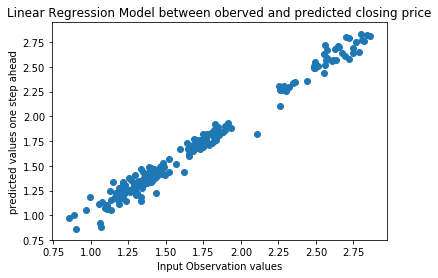

In [39]:
#scatter plot of observed and predicted values. There is a increasing linear regression between them.
#####################################################33
# Linear Regression Model
#####################################################3
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.xlabel("Input Observation values")
plt.ylabel("predicted values one step ahead")
plt.title("Linear Regression Model between oberved and predicted closing price")
plt.show()

C:\Users\jnandikonda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


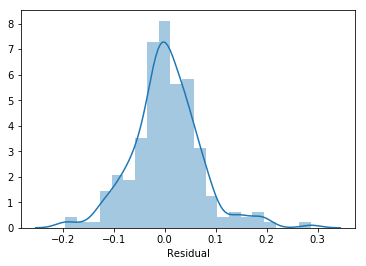

In [40]:
# Histogram plot of the residuals show that they are normally distributed.
import seaborn as sns
sns.distplot((y_test-prediction),axlabel = 'Residual')

In [41]:
#scaling back the observed and predicted values from the model to the original range
y_test_inv = scalery.inverse_transform(y_test)
predict_inv = scalery.inverse_transform(prediction)

In [42]:
#resetting the index
df.reset_index(inplace=True)

In [43]:
#################################################################################3333333333333333
#
# Visualizing the Price (Close price) and Prediction(+1 day forecast) on the same chart
##########################################################################################33
import plotly
plotly.__version__
import plotly.plotly as py
plotly.tools.set_credentials_file(username='jnandikonda', api_key='LFuC6vc5wjwuPKQNvrXf')
import plotly.graph_objs as go


trace1 = go.Scatter(x=df.date,y=y_test_inv,name = 'observed close price')
trace2 = go.Scatter(x=df.date,y=predict_inv,name = 'predicted price')
data = [trace1,trace2]
layout = go.Layout(title="Observed Vs predicted close price", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure = go.Figure(data=data,layout=layout)
py.iplot(figure,filename ="Actual Vs predicted close price")